## Quantifying changes in Eigenmode-FC similarity

In [1]:
# number stuff imports
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# spectrome imports
from spectrome.brain import Brain
from spectrome.utils import functions, path
from spectrome.forward import eigenmode, get_complex_laplacian

In [2]:
# house keeping things: directory for hcp dataset
hcp_dir = "/home/axiezai/lab/brain-scfc/spectrome/spectrome/data"

# Define frequency range of interest
fmin = 2  # 2Hz - 45Hz signal range, filter for this with hbp
fmax = 45
fvec = np.linspace(fmin, fmax, 44)

# Define range of alpha/frequency parameter
alpha = np.linspace(0.5, 15, 5)
freq = np.linspace(2, 45, 5)


# load the canonical networks (Yeo 2017)
com_dk = np.load(
    "/home/axiezai/lab/brain-scfc/spectrome/spectrome/data/com_dk.npy"
).item()
DK_df_normalized = pd.read_csv(
    "/home/axiezai/lab/brain-scfc/spectrome/spectrome/data/DK_dictionary_normalized.csv"
).set_index("Unnamed: 0")
coords = np.array([com_dk[region] for region in DK_df_normalized.columns])

# we need to threshold so that the sparsity of all canonical networks are similar to each other
upperb, lowerb = 1, 0
Dkfc_binarized = pd.DataFrame(
    [], index=DK_df_normalized.index, columns=DK_df_normalized.columns
)
for names in DK_df_normalized.index:
    u = np.mean(np.nan_to_num(DK_df_normalized.loc[names].values))
    s = np.std(np.nan_to_num(DK_df_normalized.loc[names].values))
    threshold = u - s * 0.1
    Dkfc_binarized.loc[names] = np.where(
        DK_df_normalized.loc[names].values > threshold, upperb, lowerb
    )


In [3]:
# Creating HCP brain object for spectrome and eigenmodes
HCP_brain = Brain.Brain()
HCP_brain.add_connectome(hcp_dir)  # loads HCP connectome
HCP_brain.reorder_connectome(HCP_brain.connectome, HCP_brain.distance_matrix)
HCP_brain.bi_symmetric_c()
HCP_brain.reduce_extreme_dir()

In [4]:
# First scan through alpha:
omega = 2 * np.pi * fvec[np.abs(fvec - 10).argmin()]  # current frequency of interest
eigthresh = 0.6  # see jupyter notebook for how this was obtained
networks_alpha = pd.DataFrame(
    np.zeros([len(alpha), Dkfc_binarized.shape[0]]), index=alpha, columns=Dkfc_binarized.index
)

In [5]:
param_alpha = alpha[0]
HCP_brain.add_laplacian_eigenmodes(w = omega, alpha = param_alpha, speed = 10, num_ev = 86)
HCP_brain.binary_eigenmodes = np.where(
        HCP_brain.norm_eigenmodes > eigthresh, upperb, lowerb
    )
# compute dice dissimilarity values for all eigenmodes
hcp_dice = eigenmode.get_dice_df(HCP_brain.binary_eigenmodes, Dkfc_binarized)

    # compute number of eigenmodes most similar to each network
for eignum in hcp_dice.head(25).index:
    iter_em = pd.to_numeric(hcp_dice.loc[eignum, :])
    best_network = iter_em.idxmin(axis=0)  # find lowest dice dissimilarity
    networks_alpha.at[param_alpha, best_network] += 1
    print(best_network)

Limbic
Limbic
Limbic
Limbic
Visual
Default
Limbic
Default
Limbic
Limbic
Somatomotor
Somatomotor
Frontoparietal
Frontoparietal
Default
Default
Dorsal_Attention
Default
Limbic
Default
Limbic
Limbic
Limbic
Limbic
Ventral_Attention


In [6]:
param_alpha = alpha[1]
HCP_brain.add_laplacian_eigenmodes(w = omega, alpha = param_alpha, speed = 10, num_ev = 86)
HCP_brain.binary_eigenmodes = np.where(
        HCP_brain.norm_eigenmodes > eigthresh, upperb, lowerb
    )
# compute dice dissimilarity values for all eigenmodes
hcp_dice = eigenmode.get_dice_df(HCP_brain.binary_eigenmodes, Dkfc_binarized)

    # compute number of eigenmodes most similar to each network
for eignum in hcp_dice.head(25).index:
    iter_em = pd.to_numeric(hcp_dice.loc[eignum, :])
    best_network = iter_em.idxmin(axis=0)  # find lowest dice dissimilarity
    networks_alpha.at[param_alpha, best_network] += 1
    print(best_network)
    
networks_alpha

Default
Default
Dorsal_Attention
Frontoparietal
Default
Frontoparietal
Default
Limbic
Somatomotor
Limbic
Somatomotor
Limbic
Limbic
Limbic
Limbic
Limbic
Ventral_Attention
Somatomotor
Somatomotor
Default
Somatomotor
Limbic
Default
Visual
Frontoparietal


Unnamed: 0,Default,Dorsal_Attention,Frontoparietal,Limbic,Somatomotor,Ventral_Attention,Visual
0.500,6.0,1.0,2.0,12.0,2.0,1.0,1.0
4.125,6.0,1.0,3.0,8.0,5.0,1.0,1.0
7.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
param_alpha = alpha[2]
HCP_brain.add_laplacian_eigenmodes(w = omega, alpha = param_alpha, speed = 10, num_ev = 86)
HCP_brain.binary_eigenmodes = np.where(
        HCP_brain.norm_eigenmodes > eigthresh, upperb, lowerb
    )
# compute dice dissimilarity values for all eigenmodes
hcp_dice = eigenmode.get_dice_df(HCP_brain.binary_eigenmodes, Dkfc_binarized)

    # compute number of eigenmodes most similar to each network
for eignum in hcp_dice.head(25).index:
    iter_em = pd.to_numeric(hcp_dice.loc[eignum, :])
    best_network = iter_em.idxmin(axis=0)  # find lowest dice dissimilarity
    networks_alpha.at[param_alpha, best_network] += 1
    #print(best_network)
    
#networks_alpha

In [8]:
param_alpha = alpha[3]
HCP_brain.add_laplacian_eigenmodes(w = omega, alpha = param_alpha, speed = 10, num_ev = 86)
HCP_brain.binary_eigenmodes = np.where(
        HCP_brain.norm_eigenmodes > eigthresh, upperb, lowerb
    )
# compute dice dissimilarity values for all eigenmodes
hcp_dice = eigenmode.get_dice_df(HCP_brain.binary_eigenmodes, Dkfc_binarized)

    # compute number of eigenmodes most similar to each network
for eignum in hcp_dice.head(25).index:
    iter_em = pd.to_numeric(hcp_dice.loc[eignum, :])
    best_network = iter_em.idxmin(axis=0)  # find lowest dice dissimilarity
    networks_alpha.at[param_alpha, best_network] += 1


In [9]:
param_alpha = alpha[4]
HCP_brain.add_laplacian_eigenmodes(w = omega, alpha = param_alpha, speed = 10, num_ev = 86)
HCP_brain.binary_eigenmodes = np.where(
        HCP_brain.norm_eigenmodes > eigthresh, upperb, lowerb
    )
# compute dice dissimilarity values for all eigenmodes
hcp_dice = eigenmode.get_dice_df(HCP_brain.binary_eigenmodes, Dkfc_binarized)

    # compute number of eigenmodes most similar to each network
for eignum in hcp_dice.head(25).index:
    iter_em = pd.to_numeric(hcp_dice.loc[eignum, :])
    best_network = iter_em.idxmin(axis=0)  # find lowest dice dissimilarity
    networks_alpha.at[param_alpha, best_network] += 1
    #print(best_network)
    
networks_alpha

Unnamed: 0,Default,Dorsal_Attention,Frontoparietal,Limbic,Somatomotor,Ventral_Attention,Visual
0.500,6.0,1.0,2.0,12.0,2.0,1.0,1.0
4.125,6.0,1.0,3.0,8.0,5.0,1.0,1.0
7.750,6.0,1.0,4.0,9.0,3.0,1.0,1.0
11.375,5.0,1.0,4.0,10.0,3.0,1.0,1.0
15.000,4.0,0.0,4.0,12.0,3.0,1.0,1.0


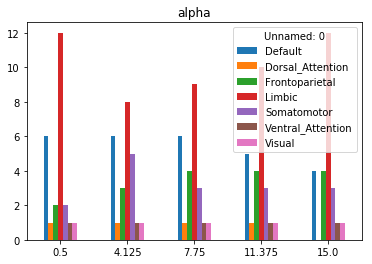

In [10]:
ax_alpha = networks_alpha.plot.bar(rot=0, title="alpha")

In [ ]:
for i in np.arange(0,len(alpha)):
    HCP_brain.add_laplacian_eigenmodes(
        # decompose laplacian and obtain eigenmodes
        w=omega,
        alpha=alpha[i],
        speed=10,
        num_ev=86,
    )

    # binarize eigen modes based on threshold
    HCP_brain.binary_eigenmodes = np.where(
        HCP_brain.norm_eigenmodes > eigthresh, upperb, lowerb
    )

    # compute dice dissimilarity values for all eigenmodes
    hcp_dice = eigenmode.get_dice_df(HCP_brain.binary_eigenmodes, Dkfc_binarized)
    #print(hcp_dice.head(10))
    # compute number of eigenmodes most similar to each network
    for eignum in hcp_dice.head(10).index:
        iter_em = pd.to_numeric(hcp_dice.loc[eignum, :])
        print("Eigenmode #{}, values = {}".format(eignum,iter_em))
        best_network = iter_em.idxmin(axis=0)  # find lowest dice dissimilarity
        networks_alpha.at[alpha[i], best_network] += 1

    # networks_count.rename(index={i:'{}'.format(alpha[i])})
    # print(networks_count)

networks_alpha.rename(columns={"Unnamed: 0": "Canonical Networks"}, inplace=True)
# plot results:
ax_alpha = networks_alpha.plot.bar(rot=0, title="alpha")

In [ ]:
networks_alpha.at[alpha[3], 'Limbic']+=1

In [ ]:
networks_alpha.loc[alpha[3],:]